In [ ]:
# Import library
from sklearn.datasets import load_iris

# Muat dataset Iris
iris = load_iris()

# Ambil fitur-fitur dan label
X = iris.data
y = iris.target

In [ ]:
import pandas as pd

# Muat dataset Iris
iris = load_iris()

# Mebuat DataFrame dari dataset iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Tampilkan beberapa baris pertama dari DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Menampilkan nilai unik pada kolom target bersama dengan nama kolom
unique_targets = iris_df['target'].unique()

print("Nama Kolom dan Nilai Unik pada Kolom Target:")
for target_value in unique_targets:
    target_name = iris_df[iris_df['target'] == target_value]['target'].values[0]
    print(f"{target_name}: {target_value}")

Nama Kolom dan Nilai Unik pada Kolom Target:
0: 0
1: 1
2: 2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Menampilkan nilai unik pada kolom target bersama dengan nama kolom
unique_targets = iris_df['target'].unique()

print("Nama Kolom dan Nilai Unik pada Kolom Target:")
for target_value in unique_targets:
    target_name = iris_df[iris_df['target'] == target_value]['target'].values[0]
    print(f"{target_name}: {target_value}")

# Memisahkan fitur dan target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Membagi dataset menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree dan melatihnya
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan metrik hasil pemodelan
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Nama Kolom dan Nilai Unik pada Kolom Target:
0: 0
1: 1
2: 2
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi model dan mengubahnya menjadi persen
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print(f"Accuracy Score: {accuracy_percentage:.2f}%")

Accuracy Score: 100.00%


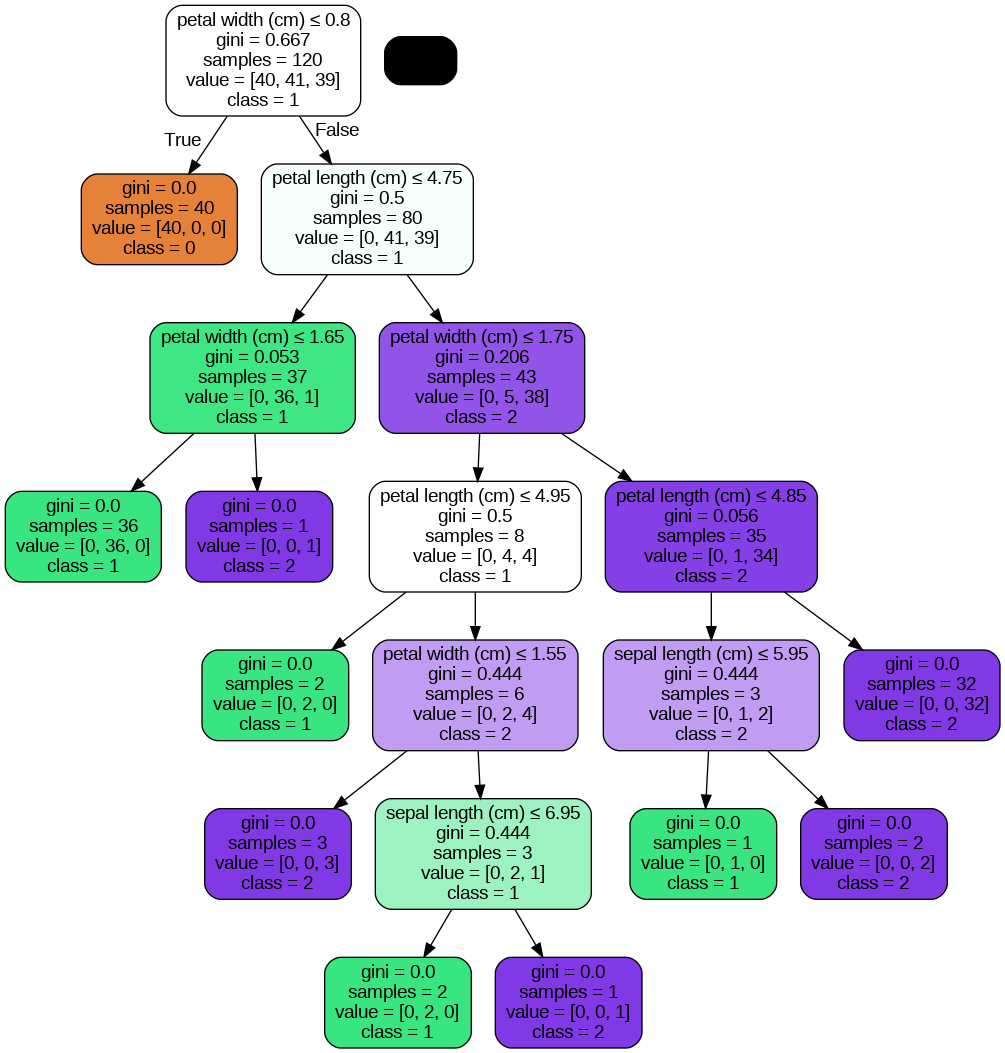

In [ ]:
!pip install graphviz
!pip install pydotplus

import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Membuat nama kolom fitur
feature_names = iris_df.columns[:-1]

# Membuat nama kelas target
target_names = [str(name) for name in iris_df['target'].unique()]

# Ekspor grafik Decision Tree
dot_data = export_graphviz(model, out_file=None,
                            feature_names=feature_names,
                            class_names=target_names,
                            filled=True, rounded=True,
                            special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

# Menyimpan grafik ke file (opsional)
graph.write_png('decision_tree.png')

# Menampilkan grafik di notebook
Image(graph.create_png())


In [ ]:
from sklearn.model_selection import train_test_split

# Membuat DataFrame sederhana
data = {'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Membagi data tanpa menggunakan random_state
X_train1, X_test1 = train_test_split(df, test_size=0.2)
print("Pembagian Data Tanpa random_state:")
print(X_train1)
print(X_test1)

# Membagi data dengan menggunakan random_state
X_train2, X_test2 = train_test_split(df, test_size=0.2, random_state=42)
print("\nPembagian Data Dengan random_state:")
print(X_train2)
print(X_test2)

Pembagian Data Tanpa random_state:
   A   B
3  4  40
4  5  50
2  3  30
1  2  20
   A   B
0  1  10

Pembagian Data Dengan random_state:
   A   B
4  5  50
2  3  30
0  1  10
3  4  40
   A   B
1  2  20


In [ ]:
X_data = range(10)
y_data = range(10)

print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    print(y_test)


print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
    print(y_test)

random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[7, 8, 0]
[2, 4, 0]
[8, 7, 3]
